# Outline

`Linear regression` is the most basic of the most basic statistical measurement models, supervised learning models.

- preprocessing

- modelling & solving optimization problems.

- Evaluation

In [252]:
# Data Management
import pandas as pd
# Data modeling
import numpy as np # matrix computation
import statsmodels.api as sm # Econometrics and statistics
import sklearn as sk # Artificial Intelligence and data mining
# Data visualization
import matplotlib.pyplot as plt

# 1. Preprocessing
- Data structure

&emsp; &emsp; &emsp; &emsp;  Survey data ≠ observational data

&emsp; &emsp; &emsp; &emsp;  Observation units: `(individual, given time) -> Cross Sectional Data` or `(individual, time) -> Time Series Data` or `(given individual, time)--> Panel Data`

&emsp; &emsp; &emsp; &emsp;  Covariate, independent variable, dependent variable

- Data set segmentation

&emsp; &emsp; &emsp; &emsp;  In the field of Artificial Intelligence and data mining: Train: Validation: Test = 70% : 10% : 20%

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  Train: Used for parameter estimation

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  Validation: Finding the optimal hyperparameter (to prevent failure, always make a cluster of similar models)

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  Test: Performing a downstream evaluation

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  Application: Deploying the model to the real life!

&emsp; &emsp; &emsp; &emsp;  In the field of Econometrics and statistics:

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  In the past, there was no concept of splitting datasets, because the focus was on `parameter estimation and hypothesis testing` and less on the `prediction` problem.

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  But it is now moving towards the former.

In [253]:
import pandas as pd
# pandas数据导入
df = pd.read_csv('Regression-SciTech.csv')
print(df.columns)

# 数据校验 - 1重复
dup = df[['ORCID', 'age']].duplicated() 
print(dup.any()) # True !  
print(dup.sum()) # 35个重复数据   # 当重复仅考虑ORCID和age时有两个

Index(['ORCID', 'to_China', 'last_phd', 'total_pub', 'age', 'work1_avg',
       'conn', 'is_Chinese', 'work_diff'],
      dtype='object')
True
2


In [254]:
# 描述统计
statsdf = df.drop('ORCID', axis=1) # 去除id，统计其他的
pd.DataFrame({'mean': statsdf.mean(), 'std':statsdf.std()})

,mean,std
to_China,0.557654,0.496765
last_phd,0.312977,0.463798
total_pub,11.539172,20.344880
age,4.837686,3.633558
work1_avg,0.138418,0.241913
conn,0.459622,0.927039
is_Chinese,0.842909,0.363960
work_diff,0.056021,0.304667


# 2. Modeling and solving optimization problems
- 2.1 Model setting

&emsp; &emsp; &emsp; &emsp;  'Linear model' is a classical model

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Univariate Version: $Y=\beta_{0}·\boldsymbol{1} + \beta_{1}·X_{1} + \epsilon$

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; Multivariate Version: $Y=\beta_{0}·\boldsymbol{1} + \beta_{1}·X_{1} + (\beta_{2}·X_{2} + ...   \beta_{K}·X_{K}) + \epsilon$

&emsp; &emsp; &emsp; &emsp;  `Explainable Nonlinear model` is the frontier model and many statisticians are exploring this topics!

I'm sure some people find linear models inplausible (as I did when I first learned them), but believer me it's a good start to understanding data.

- 2.2 Optimization objectives and constraints (repeatedly found in history, also known as the `parameter estimation'` problem)

&emsp; &emsp; &emsp; &emsp;  Elementary mathematical problems: profit `maximization`, area `maximization`, `maximum value` problem

&emsp; &emsp; &emsp; &emsp;  Economics problem: `Utility function maximization`

&emsp; &emsp; &emsp; &emsp;  Operational research problems: `combinatorial optimization problem`, `discrete optimization problem`

&emsp; &emsp; &emsp; &emsp;  Physics problem: `Lagrange multiplier method` (essentially a data optimization algorithm)

&emsp; &emsp; &emsp; &emsp;  Statistics problem: `Maximizing the likelihood function`

&emsp; &emsp; &emsp; &emsp;  Artificial Intelligence and Data Mining problems:

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  The first understanding: `minimize the loss function`

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  Gaussian invented a special `least squares method (OLS)` for linear regression

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  a.k.a finds a set of parameters that minimizes the prediction error

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;   $min_{\boldsymbol{\beta}}RMSE = min_{\boldsymbol{\beta}}\sqrt{\frac{1}{m}\sum^{m}_{i=1}(y_{i}-\hat{y_{i}})^2}$

&emsp;

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  Second understanding: '`Minimize the log-likelihood function (MLE)` (equivalent in linear regression when our sample are large enough)

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  It is necessary to use more advanced numerical optimization algorithms such as' quasi-Newton method 'and' Adam algorithm '

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  a.k.a finds a set of parameters that maximizes the probability that a sample will be observed

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  We need to add an assumption: Suppose that the perturbation term satisfies $\boldsymbol{\epsilon|X} \sim N(\boldsymbol{0}, \sigma^2\boldsymbol{I_{n}})$

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  $min_{\beta,  \sigma^2}\it{f(\boldsymbol{y}|\boldsymbol{X})}=(2\pi\sigma^2)^{-\frac{n}{2}}exp\{\frac{(y_{i}-\hat{y_{i}})^2}{2\sigma^2} The \} $

&emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  which is equivalent to optimizing $min_{\beta, \sigma^2}\it{ln(f(\boldsymbol{y}|\boldsymbol{X}))}=CONSTANT-\frac{n}{2}ln\sigma^2-\frac{(y_{i}-\hat{y_{i}})^2}{2\sigma^2 } $

2.3 Using the trained model to do downstream tasks (output something)

> Linear regression is explicit modeling (can write a relatively simple formula, ChatGPT is also a model but can not be written), some will fit the model to the report for migration application.

&emsp; &emsp; &emsp; &emsp;  In-sample `Fitting`

&emsp; &emsp; &emsp; &emsp;  Out-of-sample `predictions (continuous values, discrete categories)`

In [255]:
# statsmodels建模

# 模型一，简单多元线性回归
y = df['work_diff'] 
Xdf = df[['to_China', 'last_phd', 'total_pub', 'age', 'conn', 'is_Chinese']]
X = sm.add_constant(Xdf)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

'''
数据结果分析说明：
模型一：简单的多元线性回归
（1） R2=0.035；调整R2=0.032 （依据自变量数目调整），说明模型整体拟合效果较差。
不过模型通过了F检验，说明模型优于直接预测y为数据中y的均值 （手动狗头）
（2） 关注核心自变量to_china的系数预测，其/beta值为0.0145，标准误为0.924，p值为0.355，故无法拒绝其系数为0的原假设
系数的含义（若显著可以这么解释）：由于to_china是二值变量，所以系数可以解释为，控制其他因素后，选择回到中国（x为1）的人，观测到的work_diff(y)的期望会增加0.0145。
（3）其他自变量
const 常数项，意义是其他所有自变量都为0时，观察到的work_diff的期望，该值的意义不大，因为不少连续变量取0时没有什么现实意义
last_phd 也是二值变量，其系数显著。该系数说明在控制了其他变量的情况下，流动前已经博士毕业的人的平均work_diff比流动前未博士毕业的人低0.0714
total_pub 是数值变量，其系数显著。在控制了其他变量的情况下，流动前发表的论文数量每多1篇，流动后work_diff的期望就减少0.0018

（4）结论
这个模型并不支持流入中国使科学家的业绩变好的假设。
'''

                            OLS Regression Results                            
Dep. Variable:              work_diff   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           9.17e-17
Time:                        20:29:19   Log-Likelihood:                -529.04
No. Observations:                2489   AIC:                             1072.
Df Residuals:                    2482   BIC:                             1113.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0510      0.024      2.098      0.0

'\n数据结果分析说明：\n模型一：简单的多元线性回归\n（1） R2=0.035；调整R2=0.032 （依据自变量数目调整），说明模型整体拟合效果较差。\n不过模型通过了F检验，说明模型优于直接预测y为数据中y的均值 （手动狗头）\n（2） 关注核心自变量to_china的系数预测，其/beta值为0.0145，标准误为0.924，p值为0.355，故无法拒绝其系数为0的原假设\n系数的含义（若显著可以这么解释）：由于to_china是二值变量，所以系数可以解释为，控制其他因素后，选择回到中国（x为1）的人，观测到的work_diff(y)的期望会增加0.0145。\n（3）其他自变量\nconst 常数项，意义是其他所有自变量都为0时，观察到的work_diff的期望，该值的意义不大，因为不少连续变量取0时没有什么现实意义\nlast_phd 也是二值变量，其系数显著。该系数说明在控制了其他变量的情况下，流动前已经博士毕业的人的平均work_diff比流动前未博士毕业的人低0.0714\ntotal_pub 是数值变量，其系数显著。在控制了其他变量的情况下，流动前发表的论文数量每多1篇，流动后work_diff的期望就减少0.0018\n\n（4）结论\n这个模型并不支持流入中国使科学家的业绩变好的假设。\n'

In [256]:
# sklearn建模
# 和前面一样加载数据
y = df['work_diff']
Xdf = df[['to_China', 'last_phd', 'total_pub', 'age', 'conn', 'is_Chinese']]
randSeed = 65 # 固定随机种子

# 原始数据分割
from sklearn.model_selection import train_test_split
X_train, X_else, y_train, y_else = train_test_split(Xdf, y, test_size=0.3,  # 先划分出训练集
                                                 shuffle=True, 
                                                 random_state=randSeed)
X_valid, X_test, y_valid, y_test = train_test_split(X_else, y_else, test_size=0.66,  # 再划分验证集和测试集
                                                 shuffle=True, 
                                                 random_state=randSeed)
print(len(X_train), len(X_valid), len(X_test)) # 划分的三个集合的长度

# 加载模型
from sklearn import linear_model

# 模型一，基础多元线性回归
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
# 系数
print('model1')
print("coefficients:",model1.coef_)
# 截距 
print("intercept:",model1.intercept_)
# 查看后和前面的大差不差


# 模型二，加入二项式交互
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
extendedX = poly.fit_transform(X_train) # shape (1742, 21) 即 6 + C_2_6 个特征
model2 = linear_model.LinearRegression()
model2.fit(extendedX, y_train)
# 系数 
print('model2')
print("coefficients:",model2.coef_)
# 截距
print("intercept:",model2.intercept_)

# 模型三，在所有二次项式交互的基础上，采用Lasso回归（即 L1 正则，正则项会让一些不显著的系数更趋近于0 ）
# 原因是模型二加入的不少交互系数不一定相关，除了Lasso回归外，也可以采用大概模型搜索的思路，一个一个做F检验？？
model3 = linear_model.Lasso(alpha=0.05)
model3.fit(extendedX, y_train)
print('model3')
# 系数 
print("coefficients:",model3.coef_)
# 截距
print("intercept:",model3.intercept_)


# 利用validSet调整模型超参数
print('调参(模型选择)')
from sklearn.metrics import mean_squared_error, mean_absolute_error
stats_dic = {'MSE':[], 'MAE':[], 'R2':[]}
# MSE 均方误差
stats_dic['MSE'].append(mean_squared_error(y_train, model1.predict(X_train)))
stats_dic['MSE'].append(mean_squared_error(y_valid, model1.predict(X_valid)))
stats_dic['MSE'].append(mean_squared_error(y_train, model2.predict(poly.fit_transform(X_train))))
stats_dic['MSE'].append(mean_squared_error(y_valid, model2.predict(poly.fit_transform(X_valid))))
stats_dic['MSE'].append(mean_squared_error(y_train, model3.predict(poly.fit_transform(X_train))))
stats_dic['MSE'].append(mean_squared_error(y_valid, model3.predict(poly.fit_transform(X_valid))))
# RMSE就是开个方，不算了
# MAE 
stats_dic['MAE'].append(mean_absolute_error(y_train, model1.predict(X_train)))
stats_dic['MAE'].append(mean_absolute_error(y_valid, model1.predict(X_valid)))
stats_dic['MAE'].append(mean_absolute_error(y_train, model2.predict(poly.fit_transform(X_train))))
stats_dic['MAE'].append(mean_absolute_error(y_valid, model2.predict(poly.fit_transform(X_valid))))
stats_dic['MAE'].append(mean_absolute_error(y_train, model3.predict(poly.fit_transform(X_train))))
stats_dic['MAE'].append(mean_absolute_error(y_valid, model3.predict(poly.fit_transform(X_valid))))
# 调整R2
stats_dic['R2'].append(1 - (1 - model1.score(X_train, y_train)) * (len(y_train)-1) / (len(y_train) - X_train.shape[1] - 1))
stats_dic['R2'].append(1 - (1 - model1.score(X_valid, y_valid)) * (len(y_valid)-1) / (len(y_valid) - X_valid.shape[1] - 1))
stats_dic['R2'].append(1 - (1 - model2.score(poly.fit_transform(X_train), y_train)) * (len(y_train)-1) / (len(y_train) - 21 - 1)) # 21就是extended的特征数
stats_dic['R2'].append(1 - (1 - model2.score(poly.fit_transform(X_valid), y_valid)) * (len(y_valid)-1) / (len(y_valid) - 21 - 1))
stats_dic['R2'].append(1 - (1 - model3.score(poly.fit_transform(X_train), y_train)) * (len(y_train)-1) / (len(y_train) - 21 - 1))
stats_dic['R2'].append(1 - (1 - model3.score(poly.fit_transform(X_valid), y_valid)) * (len(y_valid)-1) / (len(y_valid) - 21 - 1))

#print(pd.DataFrame(stats_dic))
indices = ['Model1train', 'Model1valid', 'Model2train', 'Model2valid', 'Model3train', 'Model3valid'] 
# 从上到下的数据如下所示
print(pd.DataFrame(stats_dic))
'''
        MSE       MAE        R2
0  0.090463  0.174077  0.034179
1  0.068104  0.159262  0.017061
2  0.083340  0.169030  0.102470
3  0.061953  0.154945  0.047781
4  0.085253  0.170492  0.081868
5  0.063665  0.155830  0.021459'''
# 模型三的系数显示，X2与x3， x3与x4，x3与x5， x3与x6，x4与x5，x4与x6的交互项的系数的预测效果更好
# 模型二的拟合效果最好（尤其在验证集上），最终采用模型二

1742 253 494
model1
coefficients: [ 0.01729388 -0.07338427 -0.00042955  0.00024032  0.02283009  0.00415078]
intercept: 0.059802556651392405
model2
coefficients: [-2.77722760e-02 -5.24165688e-02 -3.98727611e-05  1.71164832e-03
 -2.66121503e-02  1.75537748e-02  1.06242357e-01  4.72599515e-03
 -8.72996903e-03  2.49431155e-02 -1.02185012e-02 -6.47620797e-03
  4.58568893e-04 -2.61871031e-02 -2.06896255e-02 -5.07466508e-05
  1.43919641e-03 -3.35382025e-03 -4.48058160e-03  8.27793201e-03
  3.21184745e-02]
intercept: 0.06406449888191747
model3
coefficients: [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.60225905e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.42965591e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.65468411e-05
  1.14172259e-03 -4.82775760e-04 -0.00000000e+00  0.00000000e+00
  0.00000000e+00]
intercept: 0.06335678401553732
调参(模型选择)
        MSE       MAE        R2
0  0.089807  0.174928  0.0231

'\n        MSE       MAE        R2\n0  0.090463  0.174077  0.034179\n1  0.068104  0.159262  0.017061\n2  0.083340  0.169030  0.102470\n3  0.061953  0.154945  0.047781\n4  0.085253  0.170492  0.081868\n5  0.063665  0.155830  0.021459'

# 3. Evaluation
- Main assessment contents of econometrics and statistics

&emsp;&emsp;&emsp;&emsp; 'Hypothesis testing of the estimated parameters' is its (traditional) core!

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 系Coefficient of significance : $H_{0} : \beta_{k} = \overline{\beta_{k}}$ here we set $\overline{\beta_{i}}=0$ 

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; a.k.a 'null hypothesis holds' <=>' There is no linear correlation between X and Y '

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; Metrics : $t_{k} = \frac{b_{k} - \beta_{k}}{SE(b_{k})}$ 

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; where $SE(b_{k})=\sqrt{s^2(\boldsymbol{X^{T}}\boldsymbol{X})^{-1}}$ is called estimated standard error, or standard error

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; Derived Merics : p-value $p_{k} = 2 · P(t > |t_{k}|)$

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; Derived Merics : confidence interval upper/lower bound 

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;$bound(\alpha) = b_{k} ± T(\frac{\alpha}{2})·SE(b_{k})$ 注 : $T(·)$ is student-t distribution function

> In a general empirical study, we often want to demonstrate that X is linearly correlated with Y, and so we want to reject the null hypothesis(but don't do p-hacking!)

> if $|t_{k}|↑$(i.e.$p_{k}↓$)，it suggests that the original hypothesis $H_{0}$ is not credible so we tend to ` refused ` original hypothesis

> So there were lots of bad papers that were 'p-hacking' for publication

> The intuitive meaning of the confidence interval here is: if the confidence level is $1-\alpha$, and the same 'sampling' runs $n$ times to get $n$ confidence intervals, then approximately $(1-\alpha)n$ confidence intervals cover the true parameter $\beta_{k}$

&emsp;&emsp;&emsp;&emsp; `Confidence intervals and prediction intervals of predicted values` are also issues of concern, but the formula is complex.

- Main evaluation in the field of artificial intelligence and data mining

&emsp;&emsp;&emsp;&emsp; `How good it fits' is its focus!

&emsp;&emsp;&emsp;&emsp; `Regression Prediction`Evaluation Metrics : $MSE$、$RMSE$、$MAE$、$R^2$

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;  $↓MSE = \frac{1}{m}\sum^{m}_{i=1}(y_{i}-\hat{y_{i}})^2$

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;  $↓RMSE = \sqrt{\frac{1}{m}\sum^{m}_{i=1}(y_{i}-\hat{y_{i}})^2}$ ` artificial intelligence and data mining`

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;  $↓MAE = \sqrt{\frac{1}{m}\sum^{m}_{i=1}|y_{i}-\hat{y_{i}}|}$ ` artificial intelligence and data mining`

&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;  $↑R^2 = 1-\frac{\sum^{m}_{i=1}(y_{i}-\hat{y_{i}})^2}{\sum^{m}_{i=1}(y_{i}-\overline{y_{i}})^2}$ ` artificial intelligence and data mining`

In [257]:
# statsmodels评估

# 模型一，简单多元线性回归
y = df['work_diff']
Xdf = df[['to_China', 'last_phd', 'total_pub', 'age', 'conn', 'is_Chinese']]
X = sm.add_constant(Xdf)

mod = sm.OLS(y, X)
res = mod.fit()
print('评估结果：')
print(res.summary())

'''
数据结果分析说明：
模型一：简单的多元线性回归
（1） R2=0.035；调整R2=0.032 （依据自变量数目调整），说明模型整体拟合效果较差。
不过模型通过了F检验，说明模型优于直接预测y为数据中y的均值 （手动狗头）
（2） 关注核心自变量to_china的系数预测，其/beta值为0.0145，标准误为0.924，p值为0.355，故无法拒绝其系数为0的原假设
系数的含义（若显著可以这么解释）：由于to_china是二值变量，所以系数可以解释为，控制其他因素后，选择回到中国（x为1）的人，观测到的work_diff(y)的期望会增加0.0145。
（3）其他自变量
const 常数项，意义是其他所有自变量都为0时，观察到的work_diff的期望，该值的意义不大，因为不少连续变量取0时没有什么现实意义
last_phd 也是二值变量，其系数显著。该系数说明在控制了其他变量的情况下，流动前已经博士毕业的人的平均work_diff比流动前未博士毕业的人低0.0714
total_pub 是数值变量，其系数显著。在控制了其他变量的情况下，流动前发表的论文数量每多1篇，流动后work_diff的期望就减少0.0018

（4）结论
这个模型并不支持流入中国使科学家的业绩变好的假设。
'''

评估结果：
                            OLS Regression Results                            
Dep. Variable:              work_diff   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           9.17e-17
Time:                        20:29:20   Log-Likelihood:                -529.04
No. Observations:                2489   AIC:                             1072.
Df Residuals:                    2482   BIC:                             1113.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0510      0.024      2.098   

'\n数据结果分析说明：\n模型一：简单的多元线性回归\n（1） R2=0.035；调整R2=0.032 （依据自变量数目调整），说明模型整体拟合效果较差。\n不过模型通过了F检验，说明模型优于直接预测y为数据中y的均值 （手动狗头）\n（2） 关注核心自变量to_china的系数预测，其/beta值为0.0145，标准误为0.924，p值为0.355，故无法拒绝其系数为0的原假设\n系数的含义（若显著可以这么解释）：由于to_china是二值变量，所以系数可以解释为，控制其他因素后，选择回到中国（x为1）的人，观测到的work_diff(y)的期望会增加0.0145。\n（3）其他自变量\nconst 常数项，意义是其他所有自变量都为0时，观察到的work_diff的期望，该值的意义不大，因为不少连续变量取0时没有什么现实意义\nlast_phd 也是二值变量，其系数显著。该系数说明在控制了其他变量的情况下，流动前已经博士毕业的人的平均work_diff比流动前未博士毕业的人低0.0714\ntotal_pub 是数值变量，其系数显著。在控制了其他变量的情况下，流动前发表的论文数量每多1篇，流动后work_diff的期望就减少0.0018\n\n（4）结论\n这个模型并不支持流入中国使科学家的业绩变好的假设。\n'

In [258]:
# sklearn评估

# 模型评估
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
stats_dic = {}
stats_dic = {'MSE':[], 'MAE':[], 'R2':[]}
# MSE 均方误差
stats_dic['MSE'].append(mean_squared_error(y_train, model2.predict(poly.fit_transform(X_train))))
stats_dic['MSE'].append(mean_squared_error(y_test, model2.predict(poly.fit_transform(X_test))))
# RMSE就是开个方，不算了
# MAE 
stats_dic['MAE'].append(mean_absolute_error(y_train, model2.predict(poly.fit_transform(X_train))))
stats_dic['MAE'].append(mean_absolute_error(y_test, model2.predict(poly.fit_transform(X_test))))
# R2
stats_dic['R2'].append(model2.score(poly.fit_transform(X_train), y_train)) # 21就是extended的特征数
stats_dic['R2'].append(model2.score(poly.fit_transform(X_test), y_test))
print(pd.DataFrame(stats_dic))
'''
        MSE       MAE        R2
0  0.083340  0.169030  0.113296
1  0.098915  0.183462  0.006348
'''
# 0为训练集，1为测试集。测试集上的R方偏低，


        MSE       MAE        R2
0  0.085530  0.172244  0.072884
1  0.091817  0.171779  0.033123


'\n        MSE       MAE        R2\n0  0.083340  0.169030  0.113296\n1  0.098915  0.183462  0.006348\n'

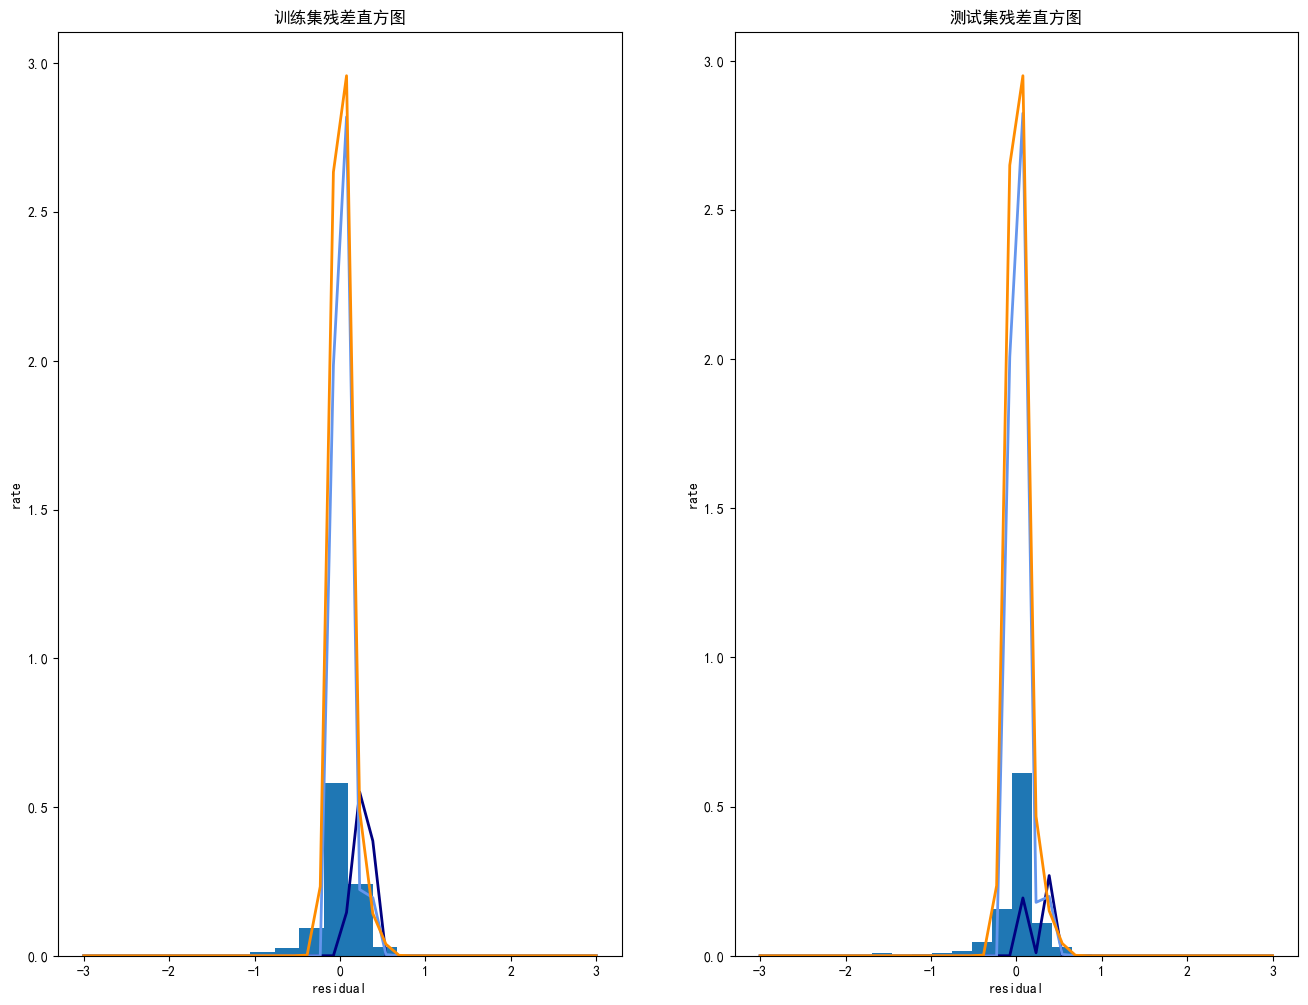

In [259]:
# 计算残差
residual_train = model2.predict(poly.fit_transform(X_train)) - y_train
residual_test = model2.predict(poly.fit_transform(X_test)) - y_test
# 进行核密度估计，需要导入库计算经验分布函数，进而得到经验概率密度
from statsmodels.distributions.empirical_distribution import ECDF 
residual_train_e_d = ECDF(residual_train)
residual_test_e_d = ECDF(residual_test)
# 计算经验概率密度函数
x = np.linspace(-3, 3, 40)
delta = 6/40
residual_train_e_prop = residual_train_e_d(x) - residual_train_e_d(x-delta)
residual_test_e_prop = residual_test_e_d(x) - residual_test_e_d(x-delta)

# 核密度估计参数
from sklearn.neighbors import KernelDensity
kernel = "gaussian"
bandwidths = [0.01, 0.05, 0.1]
lw = 2
colors = ["navy", "cornflowerblue", "darkorange"]


# 绘图
import matplotlib.pyplot as plt

figs, axs = plt.subplots(1, 2, figsize=(16, 12), dpi=100)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

plt.subplot(1, 2, 1)
plt.hist(residual_train, bins=20, weights=np.zeros_like(residual_train) + 1 / len(residual_train))
plt.title("训练集残差直方图")
plt.xlabel("residual")
plt.ylabel("rate")

for bandwidth, color in zip(bandwidths, colors): 
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(residual_train_e_prop.reshape(-1, 1))
    log_dens = kde.score_samples(x.reshape(-1, 1))
    axs[0].plot(
        x,
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label=f"bandwidth = '{bandwidth}'"
    )


plt.subplot(1, 2, 2)
plt.hist(residual_test, bins=20, weights=np.zeros_like(residual_test) + 1 / len(residual_test))
plt.title("测试集残差直方图")
plt.xlabel("residual")
plt.ylabel("rate")
for bandwidth, color in zip(bandwidths, colors): 
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(residual_test_e_prop.reshape(-1, 1))
    log_dens = kde.score_samples(x.reshape(-1, 1))
    axs[1].plot(
        x,
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label=f"bandwidth = '{bandwidth}'"
    )
plt.show()

# 可以从核密度估计和直方图中看出，残差的分布有较高的峰度

# 参考资料
- 计量经济学与统计学库 : `statsmodels`

- 人工智能与数据挖掘库 : `sklearn`